# Predicting Analyst Consensus Notebook 2

## EDA Notebook

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahooquery import Ticker

In [22]:
# Loading in most recent data
analyst_data = pd.read_csv('CompletedData.csv')

In [23]:
analyst_data.head()

,Unnamed: 0,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF,Sector
0,0,A,166.5,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,80000000.0,529000000.0,1.353000e+09,41000000.0,Healthcare
1,1,AA,50.0,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-231000000.0,299000000.0,8.220000e+08,0.0,Basic Materials
2,2,AAN,16.0,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.0,403930000.0,1.704320e+08,0.0,Industrials
3,3,AAOI,3.4,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,24643000.0,11253000.0,-1.402200e+07,0.0,Technology
4,4,AAP,155.0,17,120.21,7.122887e+09,0.289,1,9.181402e+09,1.115472e+10,9.909550e+08,0.03891,0.0,156733000.0,7.222220e+08,0.0,Consumer Cyclical


Setting Index as Ticker

In [26]:
analyst_data.drop(['Index'], axis=1, inplace = True)
analyst_data.set_index(['Ticker'], inplace = True)

In [27]:
# Making AveragePriceTarget, ClosingPrice rounded to 2 places
analyst_data['AveragePriceTarget'] = analyst_data['AveragePriceTarget'].round(2)
analyst_data['ClosingPrice'] = analyst_data['ClosingPrice'].round(2)

In [28]:
analyst_data['ExpectedGrowthRate'] = ((analyst_data['AveragePriceTarget']-analyst_data['ClosingPrice'])/analyst_data['ClosingPrice']).round(3)

In [32]:
analyst_data.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
count,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1945.000000,1.945000e+03,1.945000e+03,1.945000e+03,1945.000000,1.945000e+03,1.945000e+03,1.945000e+03,1.945000e+03
mean,74.216329,9.573265,62.437311,9.412715e+09,0.392974,0.788175,1.099520e+10,4.109402e+09,7.962129e+08,-0.020698,3.504065e+07,4.854726e+08,5.613016e+08,2.675059e+06
std,140.557936,4.691940,128.272359,1.850647e+10,0.413331,0.408707,2.066704e+10,7.251109e+09,1.481109e+09,0.182612,1.406330e+08,1.030938e+09,1.067708e+09,1.025702e+08
min,0.600000,4.000000,0.390000,2.959104e+07,-0.151000,0.000000,4.259801e+07,0.000000e+00,-9.360000e+08,-1.000000,-4.180000e+08,-1.514000e+09,-5.137450e+08,-1.710000e+09
25%,15.500000,6.000000,10.730000,9.377692e+08,0.121000,1.000000,1.405625e+09,3.480850e+08,-1.026871e+07,-0.043340,0.000000e+00,1.528700e+07,-8.415000e+06,0.000000e+00
50%,36.580000,8.000000,28.310000,2.818498e+09,0.256000,1.000000,3.642117e+09,1.356660e+09,2.406280e+08,0.027930,0.000000e+00,1.302310e+08,1.683100e+08,0.000000e+00
75%,85.000000,13.000000,71.190000,8.396930e+09,0.510000,1.000000,1.015952e+10,4.581100e+09,9.306570e+08,0.065240,9.199000e+06,5.360000e+08,6.257270e+08,0.000000e+00
max,2800.000000,20.000000,2615.600000,1.972006e+11,1.991000,1.000000,2.271751e+11,1.091200e+11,1.257500e+10,0.238460,1.309928e+09,8.335000e+09,7.762000e+09,2.518713e+09


In [33]:
# Mapping Expected Growth Rate to Overall Reccomendation
AverageMarketGrowthRate = 0.1
analyst_data['OverallRecommendation'] = analyst_data['ExpectedGrowthRate'].apply(lambda x: 1 if x > AverageMarketGrowthRate else 0)

In [34]:
# Recommendation Counts
analyst_data['OverallRecommendation'].value_counts()

1    1533
0     412
Name: OverallRecommendation, dtype: int64

We have a class imbalance, with around 80% of our companies being projected to beat the market

In [37]:
# Getting Projected Market Cap- Based on analyst consensus growth rate
analyst_data['ProjectedMarketCap'] = ((analyst_data['MarketCap'] * analyst_data['ExpectedGrowthRate']) + analyst_data['MarketCap'])

In [38]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF,Sector
Ticker,,,,,,,,,,,,,,,
A,166.5,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,80000000.0,529000000.0,1.353000e+09,41000000.0,Healthcare
AA,50.0,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-231000000.0,299000000.0,8.220000e+08,0.0,Basic Materials
AAN,16.0,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.0,403930000.0,1.704320e+08,0.0,Industrials
AAOI,3.4,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,24643000.0,11253000.0,-1.402200e+07,0.0,Technology
AAP,155.0,17,120.21,7.122887e+09,0.289,1,9.181402e+09,1.115472e+10,9.909550e+08,0.03891,0.0,156733000.0,7.222220e+08,0.0,Consumer Cyclical


In [17]:
# Write to CSV File to Transfer to Modeling Notebook
analyst_data.to_csv('analyst_data_with_labels.csv')

### Total Revenue EDA

In [40]:
data_with_revenue = pd.read_csv('CompletedData.csv')
EDAData = analyst_data
EDAData.drop(['Index'], axis = 1, inplace = True)

In [41]:
EDAData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1945 entries, A to ZYXI
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AveragePriceTarget     1945 non-null   float64
 1   NumRatings             1945 non-null   int64  
 2   ClosingPrice           1945 non-null   float64
 3   MarketCap              1945 non-null   float64
 4   ExpectedGrowthRate     1945 non-null   float64
 5   OverallRecommendation  1945 non-null   int64  
 6   ProjectedMarketCap     1945 non-null   float64
 7   TotalRevenue           1945 non-null   float64
 8   NormEBITDA             1945 non-null   float64
 9   ReturnOnAssets         1945 non-null   float64
 10  ChangeNormEBITDA       1945 non-null   float64
 11  ChangeRevenue          1945 non-null   float64
 12  OperatingCashFlow      1945 non-null   float64
 13  ChangeOCF              1945 non-null   float64
 14  Sector                 1945 non-null   object 
dtypes: float6

In [42]:
EDAData.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
count,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1945.000000,1.945000e+03,1.945000e+03,1.945000e+03,1945.000000,1.945000e+03,1.945000e+03,1.945000e+03,1.945000e+03
mean,74.216329,9.573265,62.437311,9.412715e+09,0.392974,0.788175,1.099520e+10,4.109402e+09,7.962129e+08,-0.020698,3.504065e+07,4.854726e+08,5.613016e+08,2.675059e+06
std,140.557936,4.691940,128.272359,1.850647e+10,0.413331,0.408707,2.066704e+10,7.251109e+09,1.481109e+09,0.182612,1.406330e+08,1.030938e+09,1.067708e+09,1.025702e+08
min,0.600000,4.000000,0.390000,2.959104e+07,-0.151000,0.000000,4.259801e+07,0.000000e+00,-9.360000e+08,-1.000000,-4.180000e+08,-1.514000e+09,-5.137450e+08,-1.710000e+09
25%,15.500000,6.000000,10.730000,9.377692e+08,0.121000,1.000000,1.405625e+09,3.480850e+08,-1.026871e+07,-0.043340,0.000000e+00,1.528700e+07,-8.415000e+06,0.000000e+00
50%,36.580000,8.000000,28.310000,2.818498e+09,0.256000,1.000000,3.642117e+09,1.356660e+09,2.406280e+08,0.027930,0.000000e+00,1.302310e+08,1.683100e+08,0.000000e+00
75%,85.000000,13.000000,71.190000,8.396930e+09,0.510000,1.000000,1.015952e+10,4.581100e+09,9.306570e+08,0.065240,9.199000e+06,5.360000e+08,6.257270e+08,0.000000e+00
max,2800.000000,20.000000,2615.600000,1.972006e+11,1.991000,1.000000,2.271751e+11,1.091200e+11,1.257500e+10,0.238460,1.309928e+09,8.335000e+09,7.762000e+09,2.518713e+09


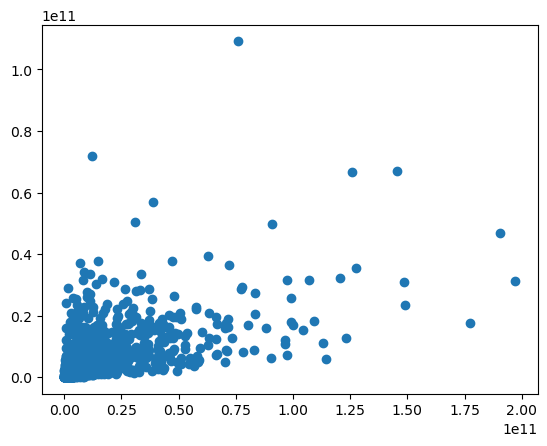

In [43]:
plt.scatter(EDAData['MarketCap'], EDAData['TotalRevenue'])

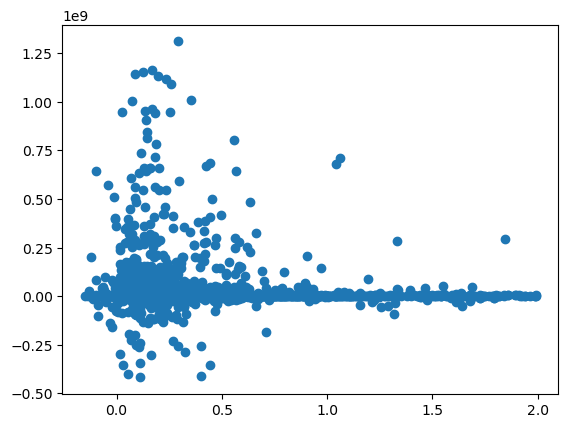

In [45]:
plt.scatter(EDAData['ExpectedGrowthRate'], EDAData['ChangeNormEBITDA'])

### EBITDA EDA

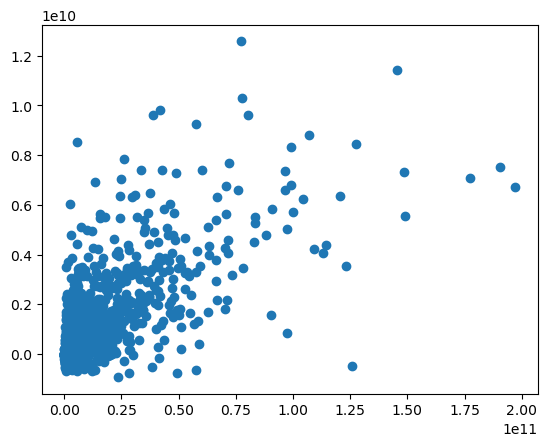

In [47]:
plt.scatter(EDAData['MarketCap'], EDAData['NormEBITDA'])

It looks like we have some outliers messing up our data that we dropped to make these better looking visualizations. We should remove them from our model as well, because they may hurt our training sample

### Return on Assets EDA

<AxesSubplot:title={'center':'ReturnOnAssets'}, xlabel='[OverallRecommendation]'>

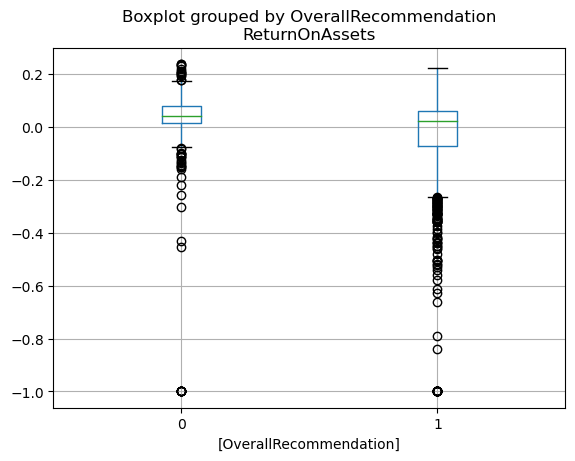

In [48]:
EDAData.boxplot(by = ['OverallRecommendation'], column = ['ReturnOnAssets'])

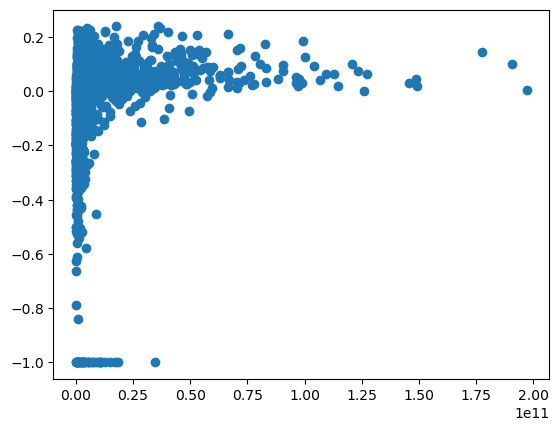

In [55]:
plt.scatter(EDAData['MarketCap'], EDAData['ReturnOnAssets'])

#### Operating Cash Flow EDA

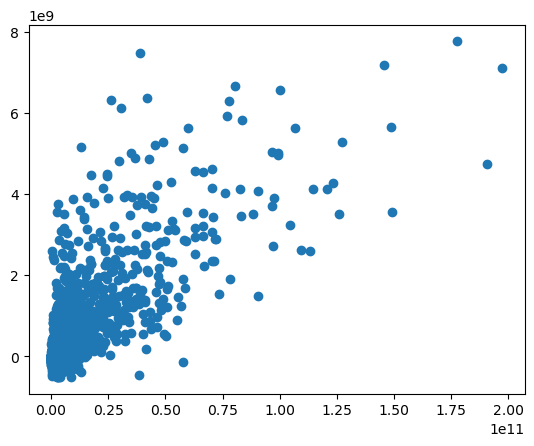

In [52]:
plt.scatter(EDAData['MarketCap'], EDAData['OperatingCashFlow'])

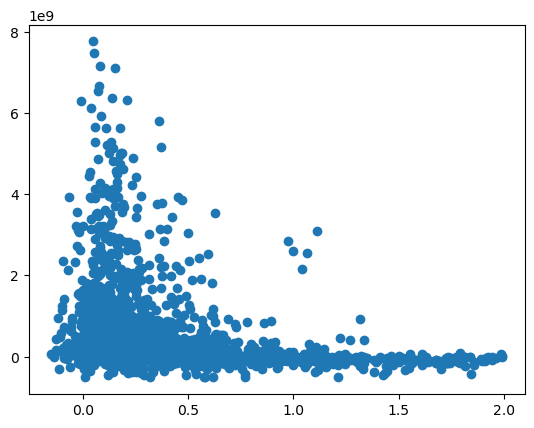

In [54]:
plt.scatter(EDAData['ExpectedGrowthRate'], EDAData['OperatingCashFlow'])